# 타이타닉 캐글
- overview : 경쟁의 설명, 평가 방법
- data : train(결과o), test(결과x), submission


In [1]:
# 1. 데이터 로드

In [2]:
df = pd.read_csv("datas/titanic/train.csv")
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
submission_df = pd.read_csv('datas/titanic/gender_submission.csv')
submission_df.tail(2)

,PassengerId,Survived
416,1308,0
417,1309,0


In [4]:
test_df = pd.read_csv("datas/titanic/test.csv")
test_df.tail(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
# 2. 데이터 전처리

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'male', 'C',
       'Q', 'S'],
      dtype='object')

In [10]:
df = pd.read_csv("datas/titanic/train.csv")
df = df[["Survived", "Pclass", "Age", "SibSp",
         "Parch", "Fare", "Embarked", "Sex"]]

sex_df = pd.get_dummies(df["Sex"])
embarked_df = pd.get_dummies(df["Embarked"])

df = pd.concat([df, sex_df, embarked_df], axis=1)

df = df.drop(columns=["Embarked", "Sex"])

df.tail(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
889,1,1,26.0,0,0,30.00,0,1,1,0,0
890,0,3,32.0,0,0,7.75,0,1,0,1,0


In [11]:
import missingno as msno

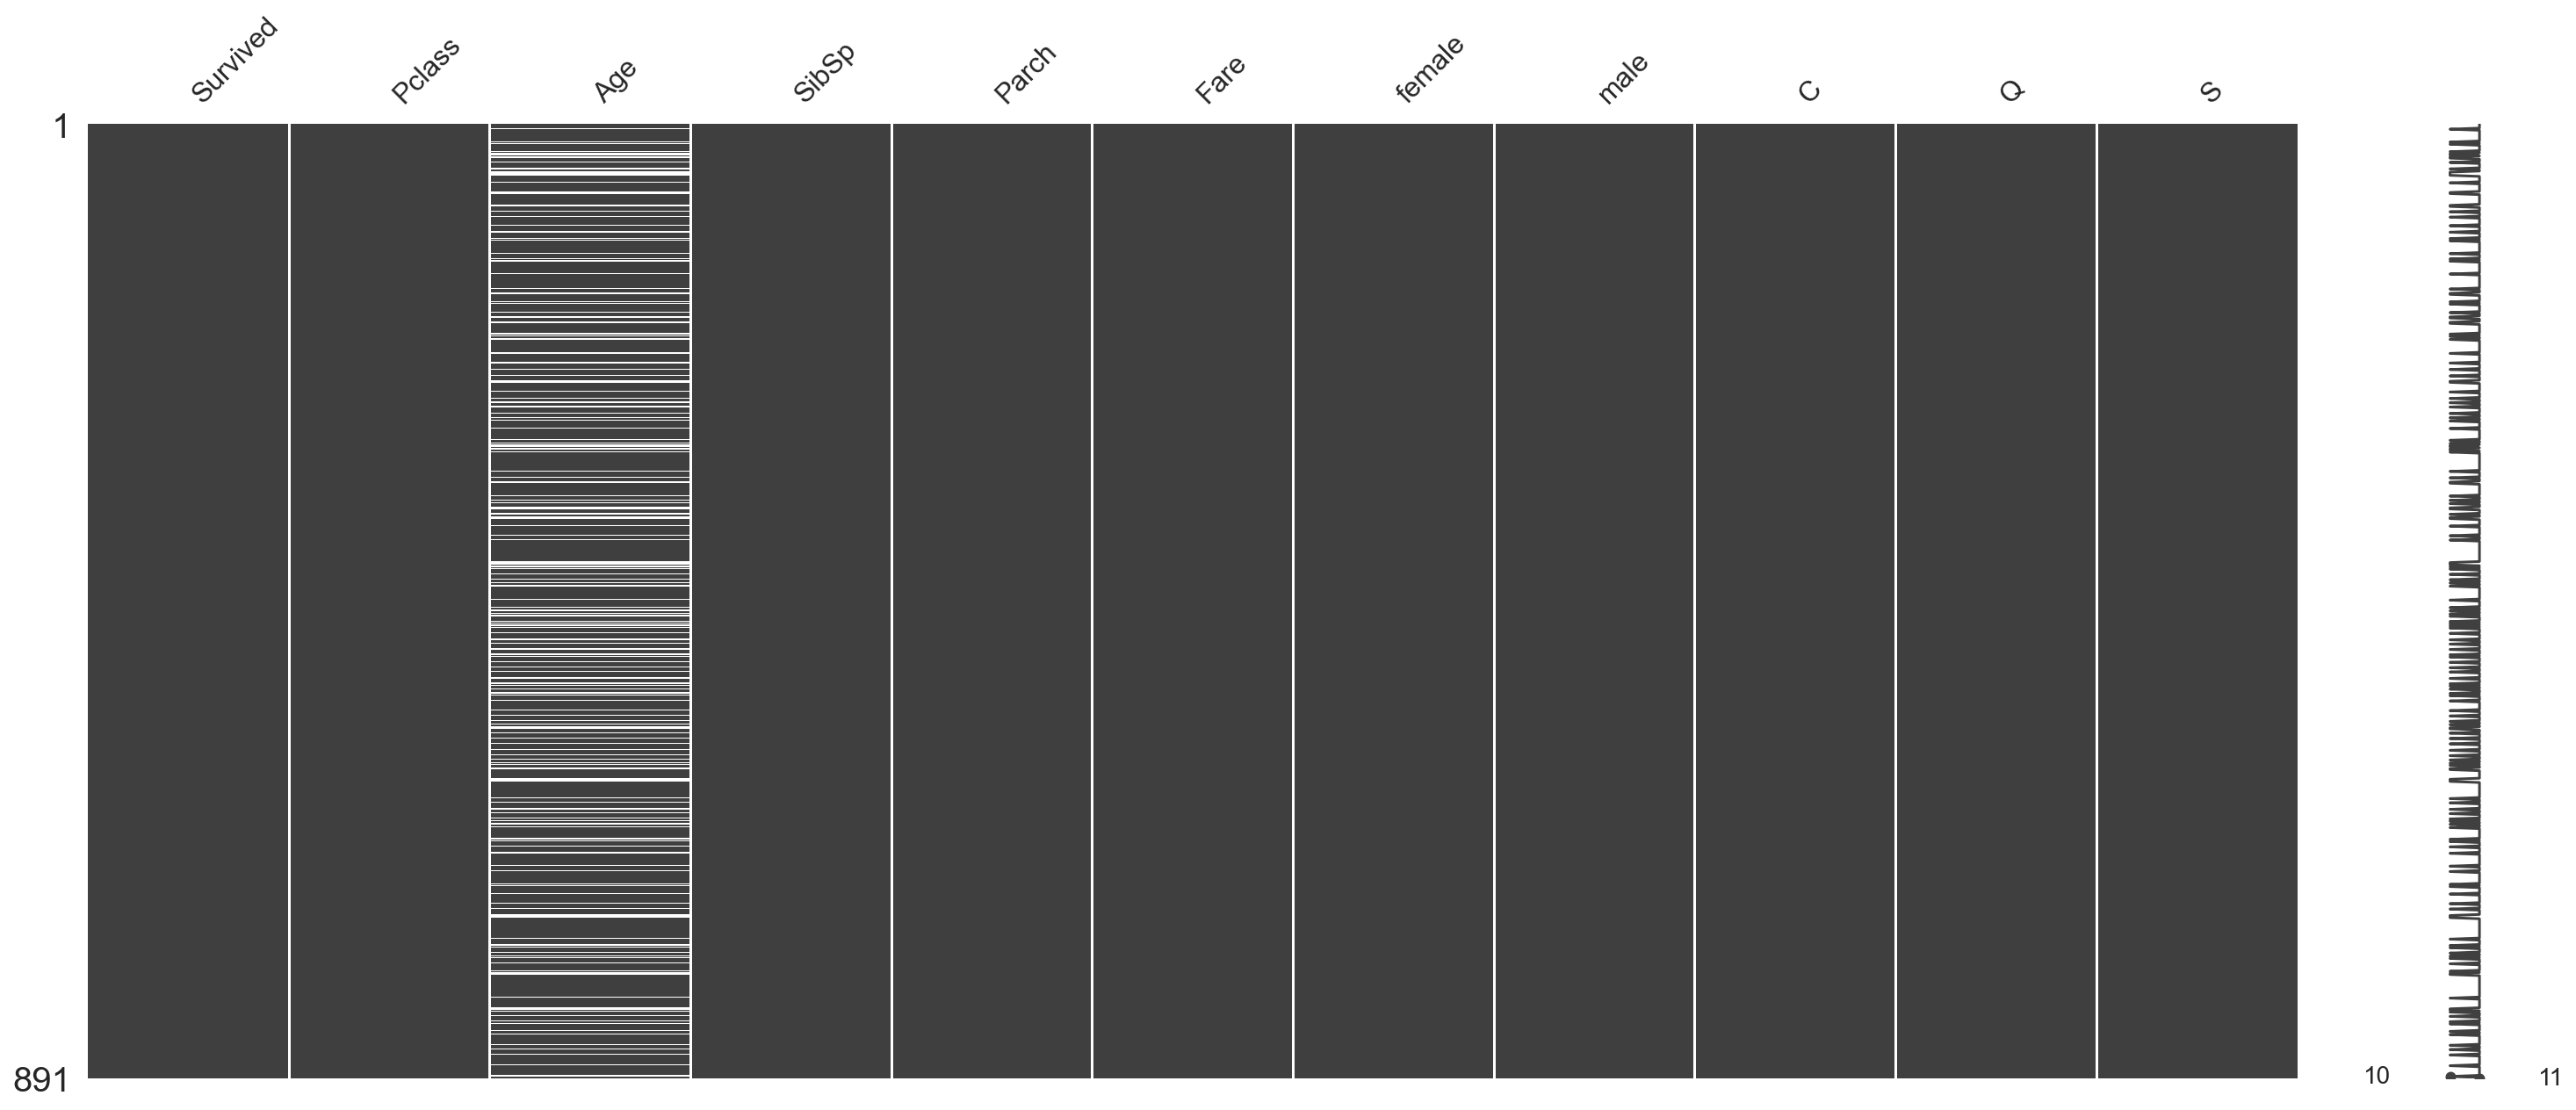

In [12]:
msno.matrix(df)

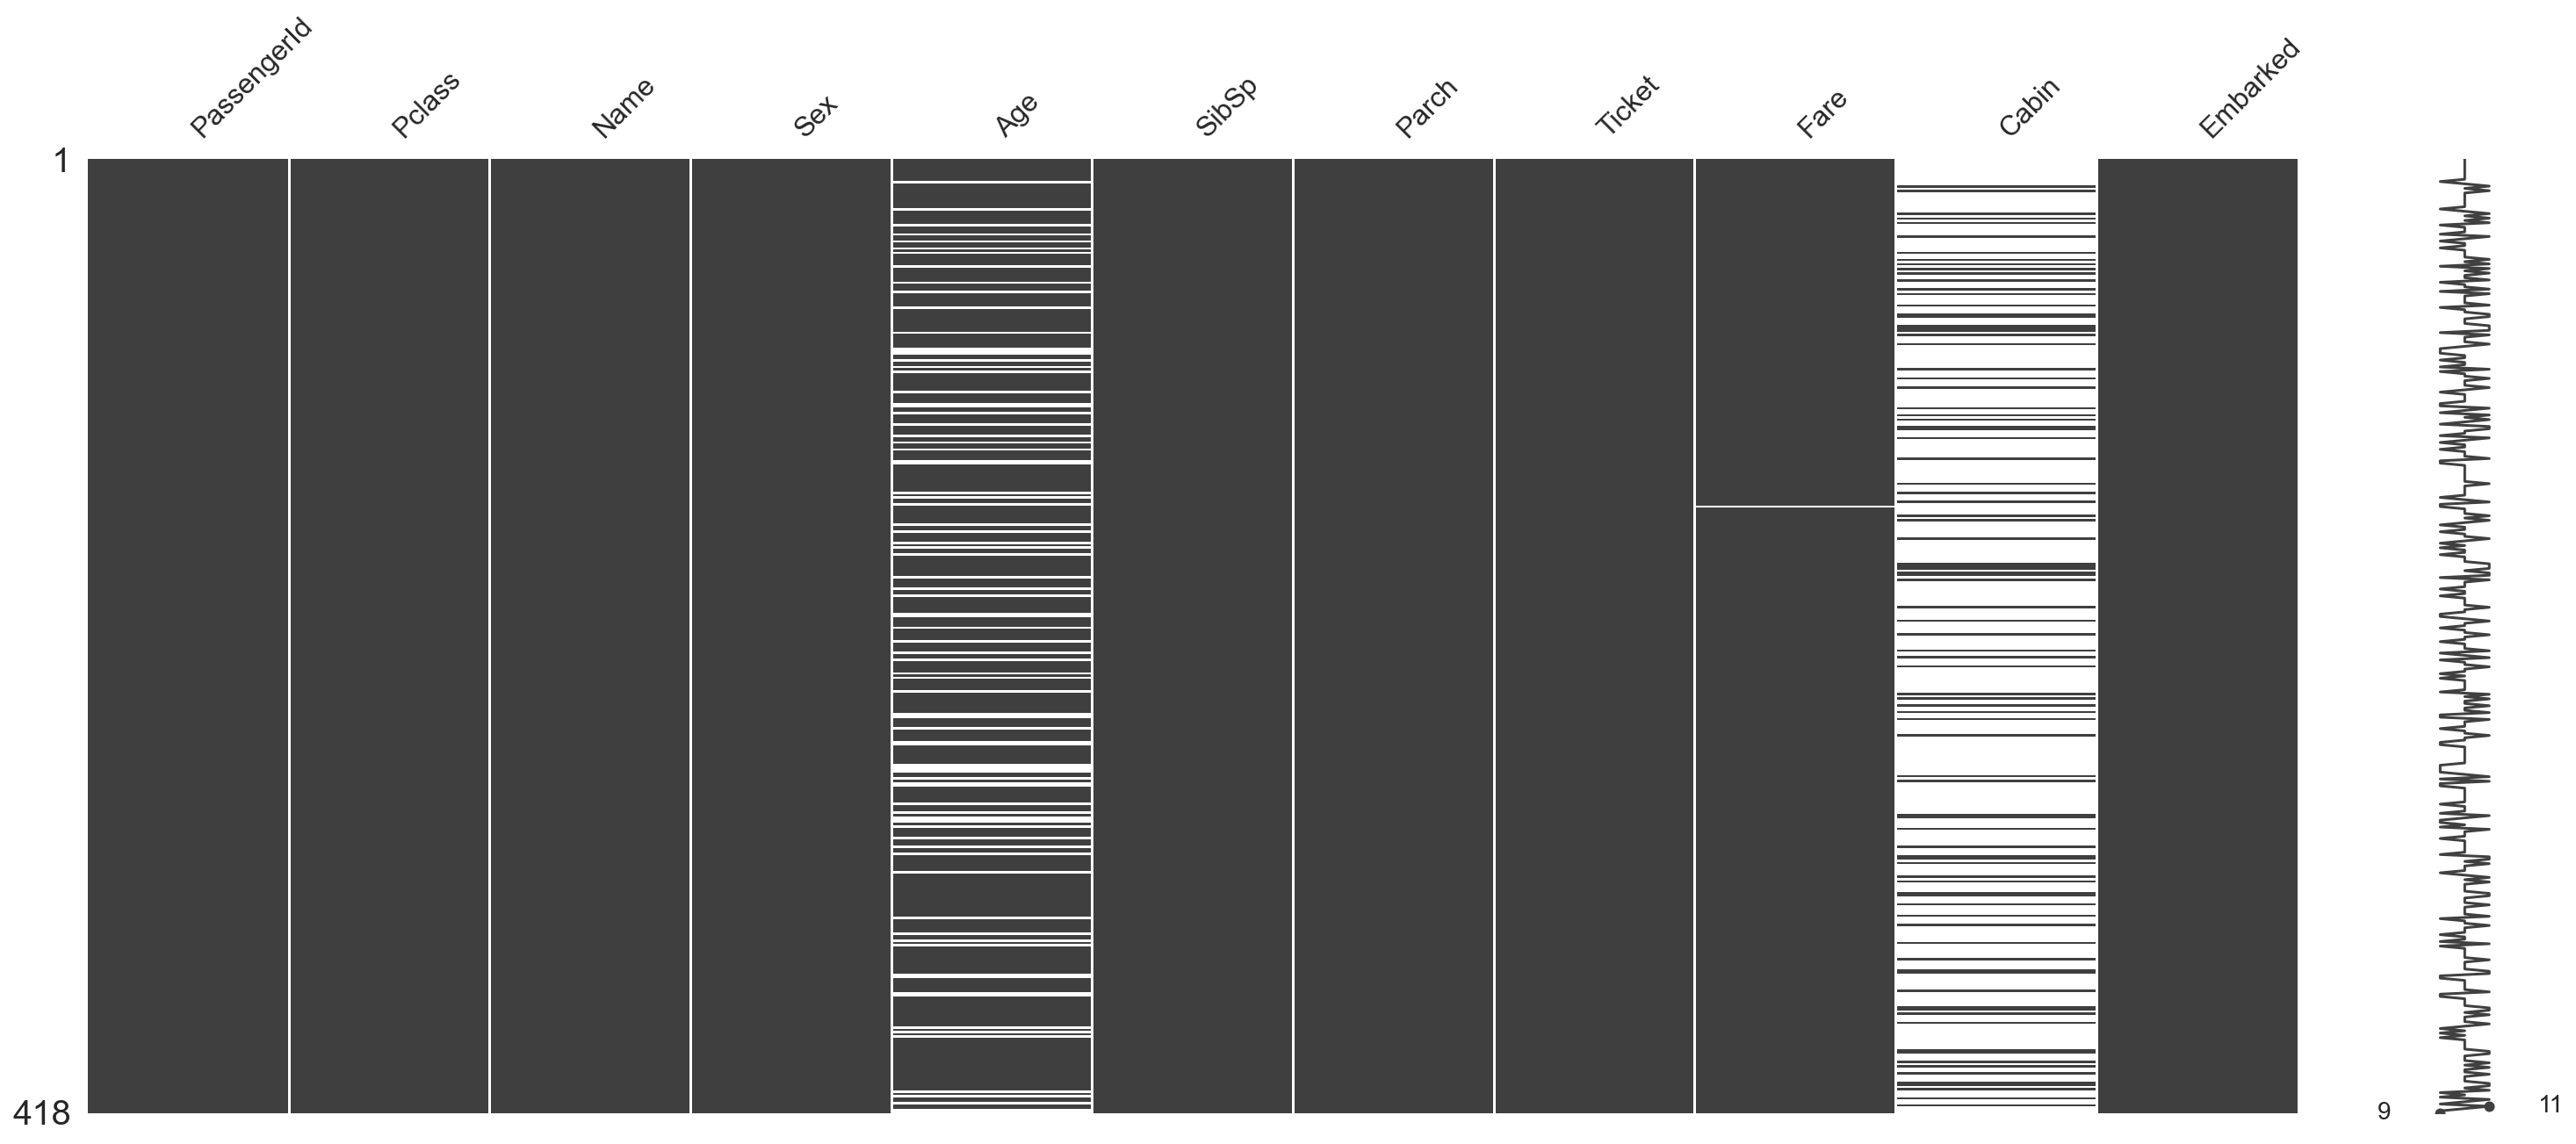

In [13]:
msno.matrix(test_df)

### 데이터 채우기

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
# 요금 데이터 채우기
imputer = SimpleImputer(strategy="median")

In [19]:
df["Age"] = imputer.fit_transform(df[["Age"]])
test_df["Age"] = imputer.fit_transform(test_df[["Age"]])
test_df["Fare"] = imputer.fit_transform(test_df[["Fare"]])

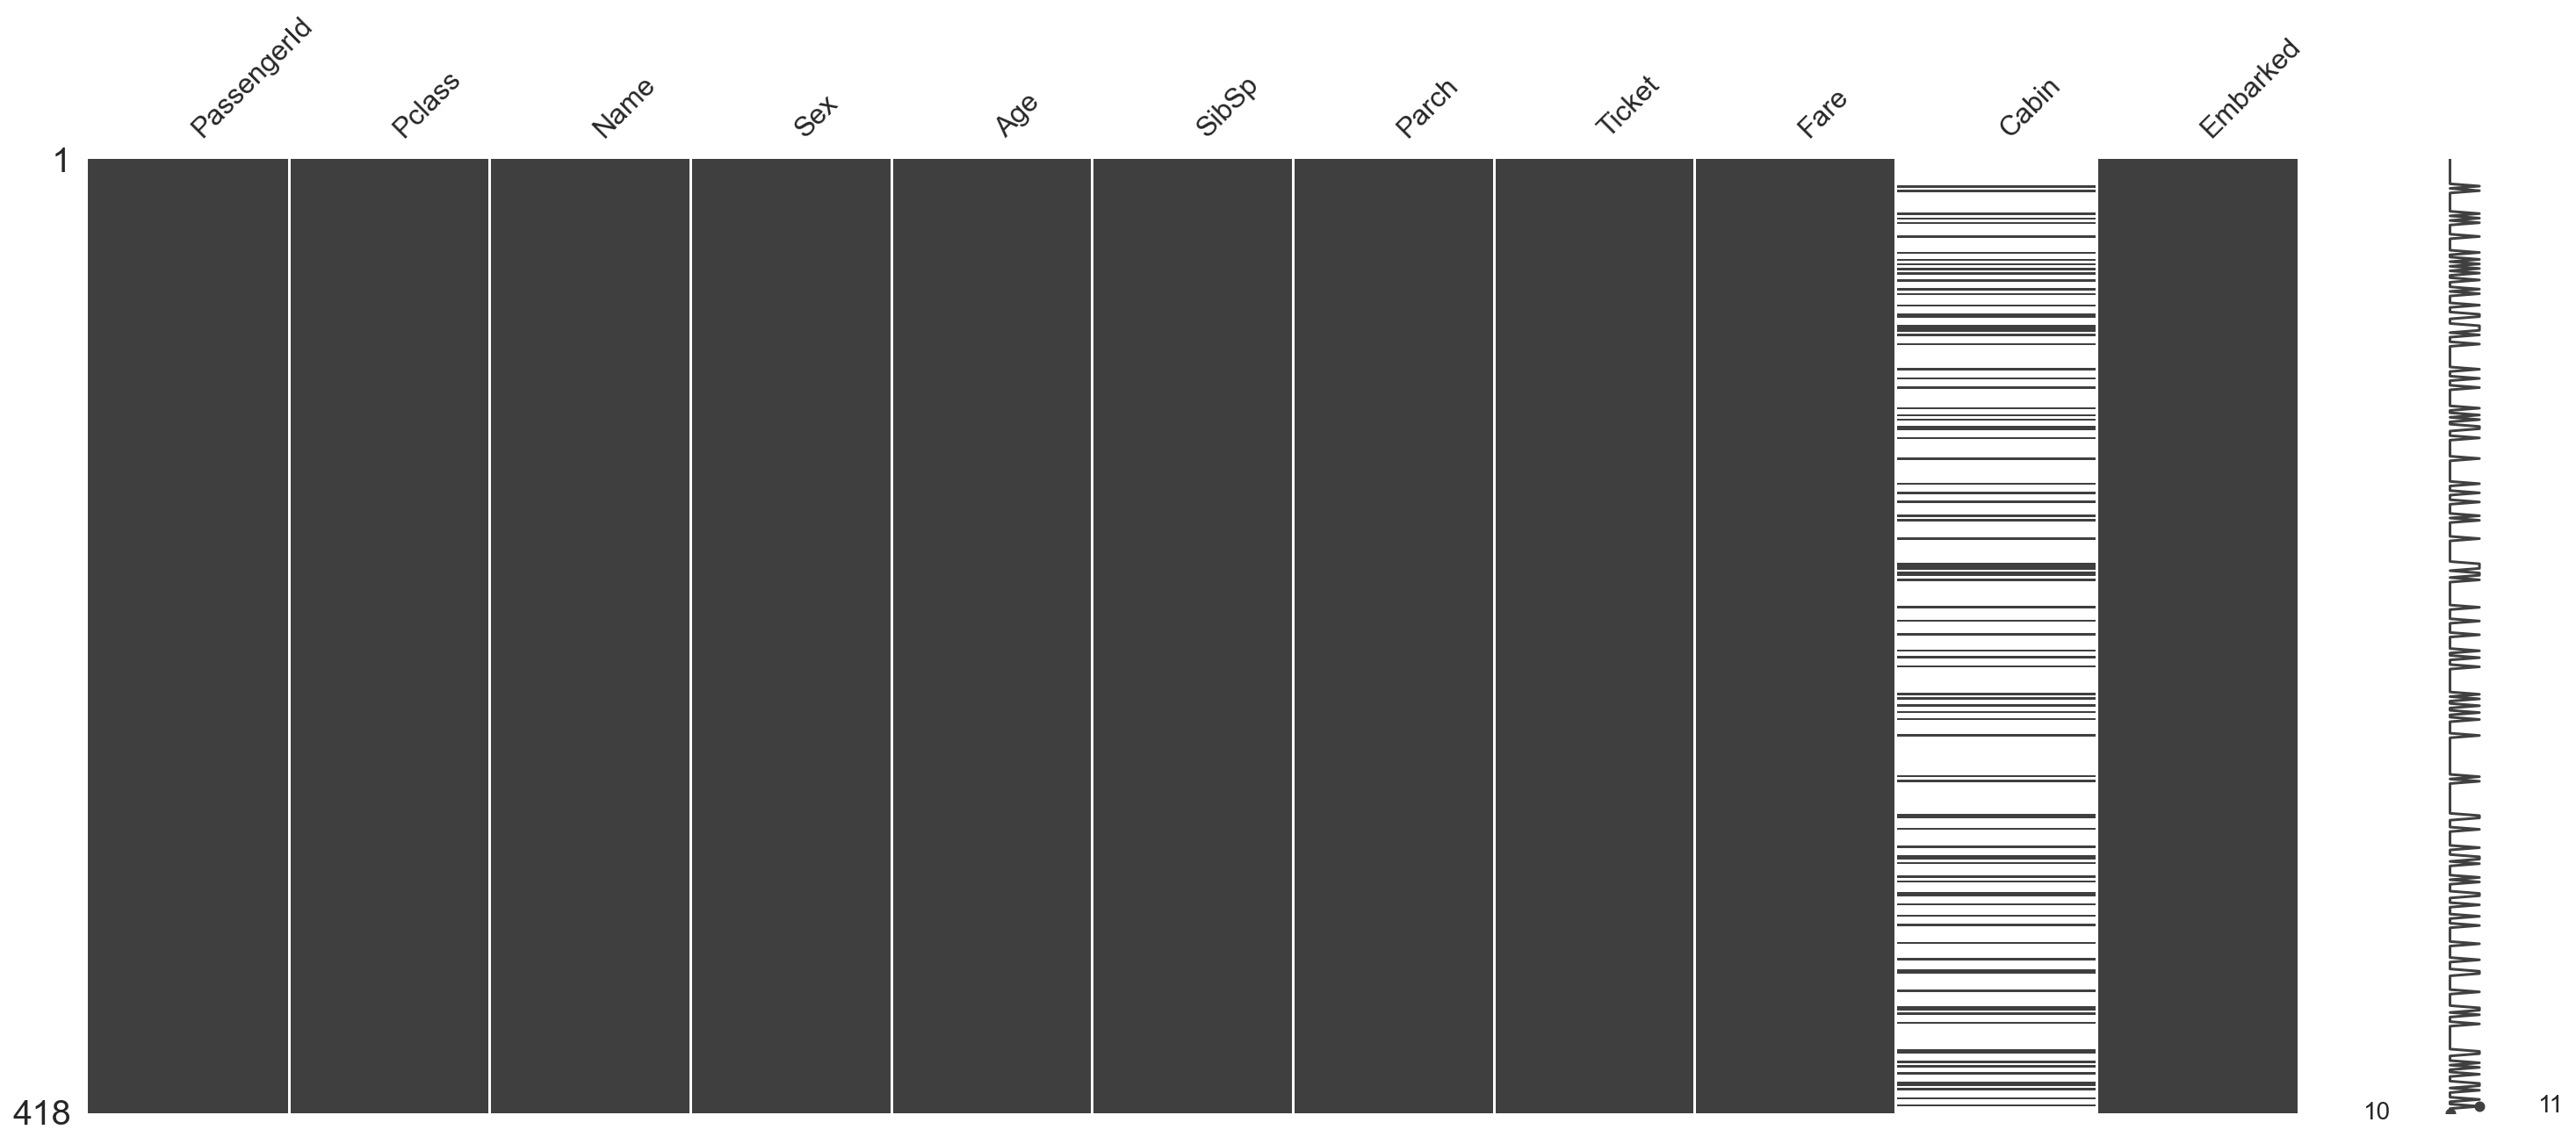

In [21]:
msno.matrix(test_df)

In [22]:
# test df 전처리
test_df = test_df.drop(columns=["Cabin"])
test_df.tail(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S
417,1309,3,"Peter, Master. Michael J",male,27.0,1,1,2668,22.3583,C


In [23]:
test_df = pd.read_csv("datas/titanic/test.csv")
test_df = test_df[["Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked", "Sex"]]

sex_df = pd.get_dummies(test_df["Sex"])
embarked_df = pd.get_dummies(test_df["Embarked"])

test_df = pd.concat([test_df, sex_df, embarked_df], axis=1)
test_df = test_df.drop(columns=["Embarked", "Sex"])

test_df["Age"] = imputer.fit_transform(test_df[["Age"]])
test_df["Fare"] = imputer.fit_transform(test_df[["Fare"]])

test_df.tail(2)

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
416,3,27.0,0,0,8.0500,0,1,0,0,1
417,3,27.0,1,1,22.3583,0,1,1,0,0


### 모델링
- train 데이터로 모델링 : train을 train set, test set 분리해서 사용

In [24]:
# 학습셋과 테스트셋 분리

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
df_x = df.drop(columns=["Survived"])
df_y = df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [28]:
len(x_train), len(x_test), len(y_train), len(y_test)

(712, 179, 712, 179)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

In [32]:
model

DecisionTreeClassifier(random_state=0)

In [34]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [35]:
round(model.score(x_test,y_test) *100, 2)

77.09

In [36]:
# 4. 예측

In [38]:
y_pred = model.predict(test_df)

In [41]:
submission_df["Survived"] = y_pred

In [42]:
submission_df.to_csv("datas/titanic/submission", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
